<img src="../imgs/ime-usp-logo.png" width="100px" align="right" display="block">

# Classificação -- Classes não linearmente separáveis

(esta página corresponde ao notebook <code>practice_classification2.ipynb</code>)

Classificação de pontos 2D : classes <font color="blue">positiva</font> (<font color="blue">1</font>) e <font color="red">negativa</font> (<font color="red">0</font>)

Coloração no gráficos:

<font color="blue">$\Huge \cdot$</font> Positive, classified as positive<br>
<font color="red">$\Huge \cdot$</font> Negative, classified as negative<br> 
<font color="blue">$\mathtt{x}$</font> Positive, classified as negative<br>
<font color="red">$\mathtt{x}$</font> Negative, classified as positive<br> 

A fronteira de decisão resultante ao se aplicar a regressão linear ou logística a um problema de classificação é sempre uma função linear (reta, plano, hiperplano). Fronteiras "tortuosas" não são possíveis.

Aqui vamos examinar a aplicação da regressão logística para a classificação de dados 2D, cuja fronteira de decisão é sabidamente não-linear. Ao final consideramos a criação de <i>features</i> polinomiais.

### Gerar dados

/Users/vitormeriat/repos/me/usp-ime-intro-machine-learning/notebooks/funcoes.py:70: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  X = np.vstack(zip(np.ones(N),x1, x2))


Shape do X:  (100, 3)
Shape do y:  (100,)


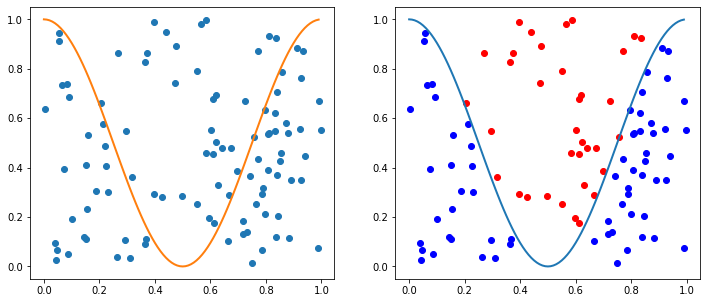

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from funcoes import geraDados2DfronteiraNonLinear

N = 100
X, y, x, fx = geraDados2DfronteiraNonLinear(N)

### Testar regressão logística

Experimente alterar o valor de alpha e o número de iterações

Initial cost:  0.125
Final cost:  0.10170491117085115
w =  [ 1.04333365  0.37268776 -1.41739896]


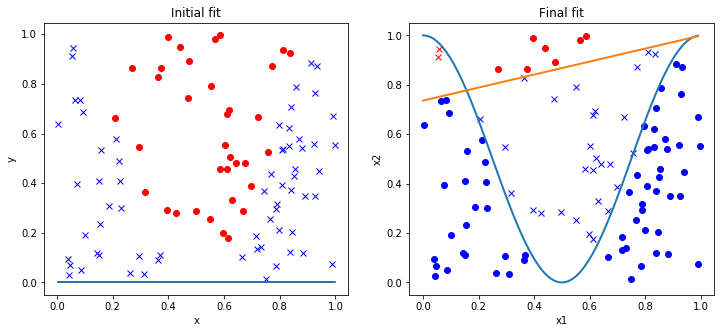

In [2]:
from funcoes import sigmoid, gradientDescent2, computeCost2

# chutar uns pesos iniciais
w = np.zeros(3)
initialCost = computeCost2(X, y, w)
print('Initial cost: ', initialCost)
R = X.dot(w)

# plotar a fronteira inicial
fig = plt.figure(figsize=(12,5))
plt.subplot(121)
plt.title('Initial fit')
for i in range(N):
    if  y[i]>0 :
        if R[i]>0:
            plt.plot(X[i,1],X[i,2],'bo')  # positivas corretas
        else:
            plt.plot(X[i,1],X[i,2],'bx')  # positivas erradas
    else:
        if R[i]>0:
            plt.plot(X[i,1],X[i,2],'rx')  # negativas erradas
        else:
            plt.plot(X[i,1],X[i,2],'ro')  # negativas corretas
plt.plot(X[:,1], X.dot(w), '-')
plt.xlabel('x')
plt.ylabel('y')

# Some gradient descent settings
iterations = 500
alpha = 0.1

# run gradient descent
w, J_history = gradientDescent2(X, y, w, alpha, iterations)

finalCost = computeCost2(X, y, w)
print('Final cost: ', finalCost)

print("w = ", w)

R = X.dot(w)
#print R

plt.subplot(122)
plt.title('Final fit')
for i in range(N):
    if  y[i]>0 :
        if R[i]>0:
            plt.plot(X[i,1],X[i,2],'bo')  # positivas corretas
        else:
            plt.plot(X[i,1],X[i,2],'rx')  # positivas erradas
    else:
        if R[i]>0:
            plt.plot(X[i,1],X[i,2],'bx')  # negativas erradas
        else:
            plt.plot(X[i,1],X[i,2],'ro')  # negativas corretas

plt.plot(x, fx, lw=2)
xs = np.arange(0, max(X[:,1]), 0.01)
fxs = [(-w[0]-w[1]*p)/w[2] for p in x ]
plt.plot(xs, fxs, lw=2)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

### Adicionar novos features (polinomiais)

O dado original estendido é da forma $(1,x_1,x_2)$. Vamos criar novas features. Expecificamente, consideraremos $(1,x_1,x_2,x_1^2,x_1x_2, x_2^2)$ e aplicar a regressão logística ao dado "ampliado".


In [3]:
X = np.vstack(zip(np.ones(N),X[:,1], X[:,2], X[:,1]*X[:,1],\
                  X[:,1]*X[:,2], X[:,2]*X[:,2]))
print(X.shape)
print(X[1,:])

(100, 6)
[1.         0.71836913 0.13319605 0.51605421 0.09568393 0.01774119]


/Users/vitormeriat/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  


Experimente variar o peso inicial, o número de iterações e o alpha (learning rate)

Initial cost:  0.125
Final cost:  0.08443022093456079
w =  [ 1.6726104  -1.70721274 -1.36020355  3.3009366  -1.57089741 -0.96233882]


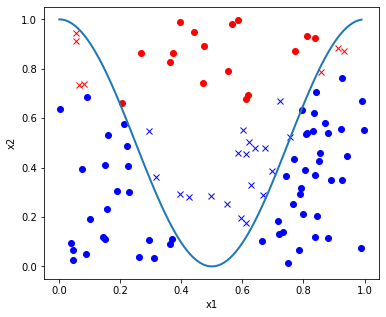

In [4]:
# chutar uns pesos iniciais
w = np.zeros(6)
initialCost = computeCost2(X, y, w)
print('Initial cost: ', initialCost)

# Some gradient descent settings
iterations = 500
alpha = 0.5

# run gradient descent
w, J_history = gradientDescent2(X, y, w, alpha, iterations)

finalCost = computeCost2(X, y, w)
print('Final cost: ', finalCost)

print("w = ", w)

R = X.dot(w)
#print R

fig = plt.figure(figsize=(6,5))

for i in range(N):
    if  y[i]>0 :
        if R[i]>0:
            plt.plot(X[i,1],X[i,2],'bo')  # positivas corretas
        else:
            plt.plot(X[i,1],X[i,2],'rx')  # positivas erradas
    else:
        if R[i]>0:
            plt.plot(X[i,1],X[i,2],'bx')  # negativas erradas
        else:
            plt.plot(X[i,1],X[i,2],'ro')  # negativas corretas

plt.plot(x, fx, lw=2)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()